In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avo_df = pd.read_csv('avocado.csv')

In [3]:
# remind ourselves of the content of this DF
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# remind ourselves what the regions are
len(avo_df["region"].unique())

54

In [5]:
total_us = avo_df.loc[avo_df["region"] == "TotalUS"]

## Evolution of a Histogram

Text(0.5, 0, 'Price in Dollars')

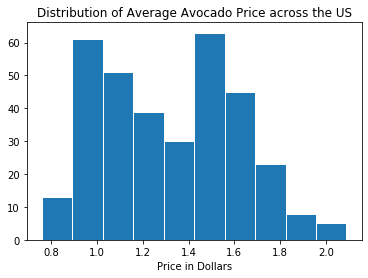

In [6]:
# create a histogram using the OOP approach 
# showing the distribution of AveragePrice for the 'Total US' region
# set the edgecolor param to "white"
# and remember to title and label it. 

fig, ax = plt.subplots()
ax.hist(total_us["AveragePrice"],
                  edgecolor="w")
ax.set_title("Distribution of Average Avocado Price across the US")
ax.set_xlabel("Price in Dollars")


In [7]:
# create custom bins using np.arange that run from 0.5 to 2.5 in steps
# of 0.25
custom_bins = np.arange(0.5, 2.5, 0.25) 
custom_bins 

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25])

Text(0, 0.5, 'Count')

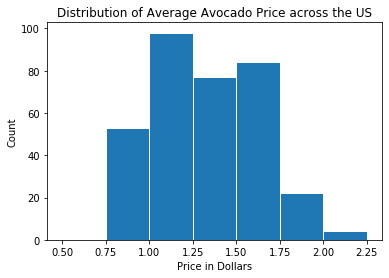

In [8]:
# re-create the histogram above using the custom bins
total_us = avo_df.loc[avo_df["region"] == "TotalUS"]
fig, ax = plt.subplots()
ax.hist(total_us["AveragePrice"],
                  edgecolor="white", bins=custom_bins)
ax.set_title("Distribution of Average Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")

In [9]:
# create custom bins using np.arange that run from 0.5 to 2.5 in steps
# of 0.25
custom_bins2 = np.arange(0.7, 2.2, 0.10)
custom_bins2 

array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
       2. , 2.1, 2.2])

Text(0, 0.5, 'Count')

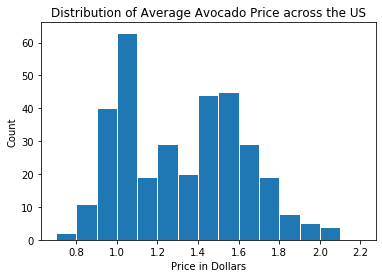

In [10]:
# re-create the histogram above using the custom bins
total_us = avo_df.loc[avo_df["region"] == "TotalUS"]
fig, ax = plt.subplots()
ax.hist(total_us["AveragePrice"],
                  edgecolor="white", bins=custom_bins2)
ax.set_title("Distribution of Average Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")

have them investigate the fact that the distribution is bimodal and actually kind of looks like two right-skewed distributions.
Walk them through figuring out that this is organic vs. conventional.

In [11]:
total_us["type"].value_counts()

organic         169
conventional    169
Name: type, dtype: int64

In [12]:
total_us["year"].value_counts()

2017    106
2016    104
2015    104
2018     24
Name: year, dtype: int64

In [15]:
total_us_conv = total_us.loc[total_us["type"] == "conventional"]
total_us_org = total_us.loc[total_us["type"] == "organic"]

Text(0, 0.5, 'Count')

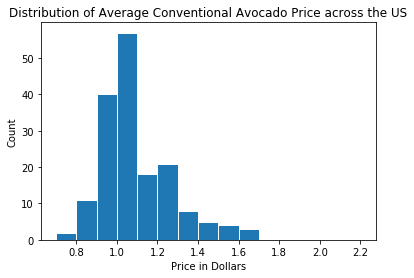

In [16]:
# create histograms for Average Price, Total us, for both organic and
# conventional 
fig, ax = plt.subplots()
ax.hist(total_us_conv["AveragePrice"],
                  edgecolor="white", bins=custom_bins2)
ax.set_title("Distribution of Average Conventional Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

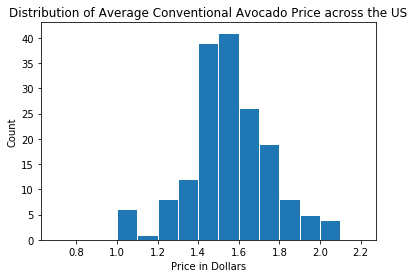

In [18]:
fig, ax = plt.subplots()
ax.hist(total_us_org["AveragePrice"],
                  edgecolor="white", bins=custom_bins2)
ax.set_title("Distribution of Average Conventional Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")

Next cool thing is that we can plot both histogram on one axes.
Copy the code for the conventional avocados into the next cell.
Then add the code just for the histogram for the organic avos
Adjust the title to reflect this. 

Text(0, 0.5, 'Count')

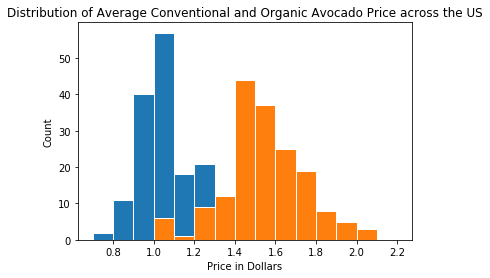

In [46]:
fig, ax = plt.subplots()
ax.hist(total_us_conv["AveragePrice"],
                  edgecolor="white", bins=custom_bins_conv)
ax.hist(total_us_org["AveragePrice"],
                  edgecolor="white", bins=custom_bins_org)
ax.set_title("Distribution of Average Conventional and Organic Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")

Now we have two issues: We're not sure how much of the blue histogram is being covered by the orange historgram, and we don't know which color belongs to which avocado type (obviously we can infer that the organic ones are the more expensive, but we shouldn't leave it to viewers to draw that conclusions.
We'll address the first issue by setting the alpha parameter to make the bars somewhat transparent, and we will use labels and a legend to identity the types. 

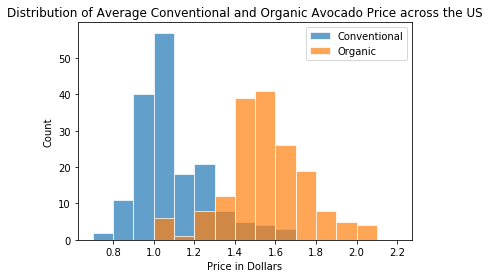

In [20]:
fig, ax = plt.subplots()
ax.hist(total_us_conv["AveragePrice"],
                  edgecolor="white", bins=custom_bins2,
                   alpha=0.7, label="Conventional")
ax.hist(total_us_org["AveragePrice"],
                  edgecolor="white", bins=custom_bins2,
                   alpha=0.7, label="Organic")
ax.set_title("Distribution of Average Conventional and Organic Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")
ax.legend()


now let's plot the median of each distribution as a vertical line

In [31]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

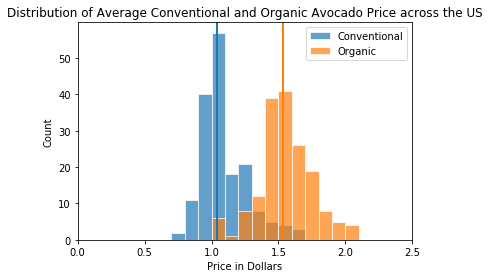

In [29]:
median_conv = total_us_conv["AveragePrice"].median()
median_org = total_us_org["AveragePrice"].median()
fig, ax = plt.subplots()
ax.hist(total_us_conv["AveragePrice"],
                  edgecolor="white", bins=custom_bins2,
                   alpha=0.7, label="Conventional")
ax.hist(total_us_org["AveragePrice"],
                  edgecolor="white", bins=custom_bins2,
                   alpha=0.7, label="Organic")
ax.axvline(median_conv, c=colors[0], lw=2)
ax.axvline(median_org, c=colors[1], lw=2)
ax.set_title("Distribution of Average Conventional and Organic Avocado Price across the US")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Count")
ax.set_xlim(0, 2.5)
ax.legend()


## Boxplot
Which region do you think consumes more conventional avocados? San Francisco, Los Angeles, or DallasFtWorth? 

In [33]:
# create a DF for each city and only conventional avocados
sf_conv = avo_df.loc[(avo_df["region"] == "SanFrancisco") & (avo_df["type"] == "conventional")]
la_conv = avo_df.loc[(avo_df["region"] == "LosAngeles") & (avo_df["type"] == "conventional")]
dfw_conv = avo_df.loc[(avo_df["region"] == "DallasFtWorth") & (avo_df["type"] == "conventional")]

(array([ 200000.,  400000.,  600000.,  800000., 1000000., 1200000.,
        1400000., 1600000., 1800000.]), <a list of 9 Text xticklabel objects>)

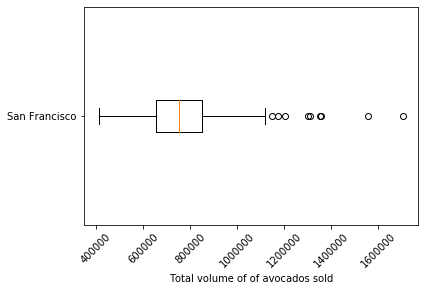

In [34]:
# plot a boxplot for each one. Make it horizontal by setting vert=False
# rotate the x axis tick labels by 45 degrees with the plt.ticks() method and rotation parameter
fig, ax = plt.subplots()
ax.boxplot(sf_conv["Total Volume"], labels=["San Francisco"], vert=False)
ax.set_xlabel("Total volume of of avocados sold")
plt.xticks(rotation=45)

(array([1000000., 1500000., 2000000., 2500000., 3000000., 3500000.,
        4000000., 4500000., 5000000., 5500000., 6000000.]),
 <a list of 11 Text xticklabel objects>)

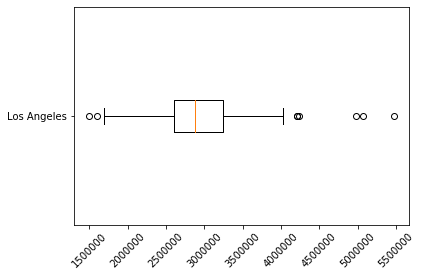

In [83]:
fig, ax = plt.subplots()
ax.boxplot(la_conv["Total Volume"], labels=["Los Angeles"], vert=False)
ax.set_xlabel("Total volume of of avocados sold")
plt.xticks(rotation=45)

(array([ 600000.,  800000., 1000000., 1200000., 1400000., 1600000.,
        1800000., 2000000.]), <a list of 8 Text xticklabel objects>)

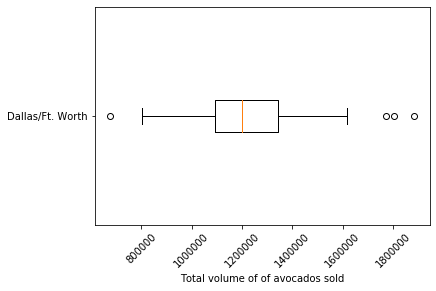

In [35]:
fig, ax = plt.subplots()
ax.boxplot(dfw_conv["Total Volume"], labels=["Dallas/Ft. Worth"], vert=False)
ax.set_xlabel("Total volume of of avocados sold")
plt.xticks(rotation=45)

With all the x axes having different ranges, it's hard to compare these boxplots. 
Let's see what happens if we try to put three boxplots on the same Axes object 

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]), <a list of 7 Text xticklabel objects>)

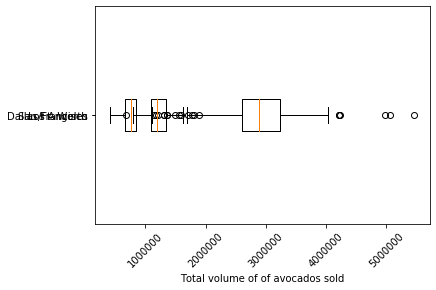

In [36]:
fig, ax = plt.subplots()
ax.boxplot(sf_conv["Total Volume"], labels=["San Francisco"], vert=False)
ax.boxplot(la_conv["Total Volume"], labels=["Los Angeles"], vert=False)
ax.boxplot(dfw_conv["Total Volume"], labels=["Dallas/Ft. Worth"], vert=False)
ax.set_xlabel("Total volume of of avocados sold")
plt.xticks(rotation=45)

Not helpful! It turns out the boxplot method is actually set up to receive multiple Series to plot simulatanously -- that's why the "labels" parameter has to be a list. 
Create a list of the three "Total Volume" Series, and a list of the three city names. 
Pass the list of three series as the first parameter of ax.boxplot
pass the list of city names under the labels parameter

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]), <a list of 7 Text xticklabel objects>)

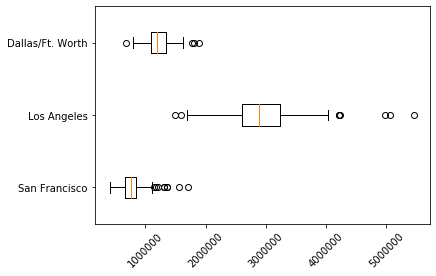

In [37]:
srs = [sf_conv["Total Volume"], la_conv["Total Volume"], dfw_conv["Total Volume"]]
cities = ["San Francisco", "Los Angeles", "Dallas/Ft. Worth"]
fig, ax = plt.subplots()
plt.boxplot(srs, vert=False, labels=cities)
plt.xticks(rotation=45)

This is kind of hard to see. Let's increase the figsize

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]), <a list of 7 Text xticklabel objects>)

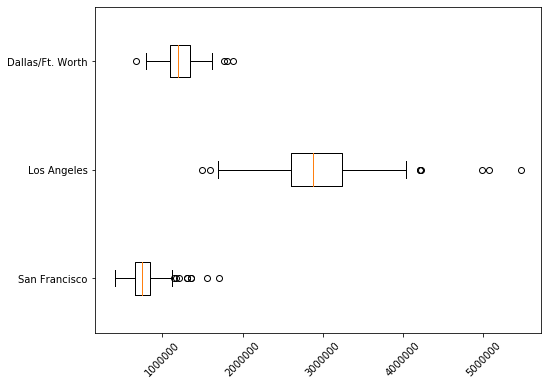

In [89]:
srs = [sf_conv["Total Volume"], la_conv["Total Volume"], dfw_conv["Total Volume"]]
cities = ["San Francisco", "Los Angeles", "Dallas/Ft. Worth"]
fig, ax = plt.subplots(figsize=(8,6))
plt.boxplot(srs, vert=False, labels=cities)
plt.xticks(rotation=45)

As we see, Los Angeles has a much higher volume of avocado sales than San Francisco or DFW. Of course, it's a much bigger city. It might be interesting to investigate the population of those cities and look at per capita volume